In [1]:
# SECTION 1 
# should run first and keep the jacobian ready
#
#
#
#
#
#
#
# 
#
#
#
#
#
# Section 2 and 3 should be run fully as per choice depending upon the type of output needed. (re-running only parts of each section might give error)

In [ ]:
import sys
sys.path.append(r'C:\nirfasterFF')
sys.path.append(r'C:\nirfasterFF\Works\sensitivity')

import Mymesh_mus  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

In [3]:
# SECTION 2
# 
# 
#
#
#
#
#
#
#
#
#
#
# run this section for seeing one x-position at a time

In [4]:
# the "difference of absorption" multiplied with the US-Jacobian


# create an absorber of desired size and position

dia_ab = 6    #diameter of spherical absorber
x_cen_ab,y_cen_ab,z_cen_ab = [30,30,40]      #centre of the absorber
dist_ab = np.sqrt(np.square((Mymesh_mus.mesh.nodes[:,0]-x_cen_ab)) + np.square((Mymesh_mus.mesh.nodes[:,1]-y_cen_ab)) + np.square((Mymesh_mus.mesh.nodes[:,2]-z_cen_ab)))
ind_ab = dist_ab < dia_ab/2
mua_selection = np.where(ind_ab)


# creating the difference in absorption 

tmp1= np.zeros(len(Mymesh_mus.mesh.nodes))
tmp1[mua_selection] = 0.01               # in-effect, this is the difference in abs
tmp2 = Mymesh_mus.mesh.vol.mesh2grid@tmp1     # mesh to grid interpolation 
tmp2 = tmp2.reshape(1,-1)          # Reshaped to look similiar to a jacobian, shape: (1, 1728000)

abs_patch = tmp2.reshape((Mymesh_mus.xgrid.size, Mymesh_mus.ygrid.size, Mymesh_mus.zgrid.size), order='f')     #absorber batch , 120x120x120

In [5]:
#Multiplying the "Change in abs" with the Jacobians

abs_md = Mymesh_mus.banana_md * abs_patch   # banana_md comes from the MD-Jacobian for scattering,
                                            # mus-part of the jacobian is selected for this here(selected in Mymesh.py). 
                                            
abs_md_avg = np.sum(abs_md)


abs_J0 = Mymesh_mus.banana1 * abs_patch     # banana1 comes from the DC-Jacobian for scattering, 
                                            # mus-part of the jacobian is selected for this here(selected in Mymesh.py).
                                            
abs_J0_avg = np.sum(abs_J0)

print(abs_J0_avg)
print(abs_md_avg)


-5.284677929942217e-10
-0.0002505039985830843


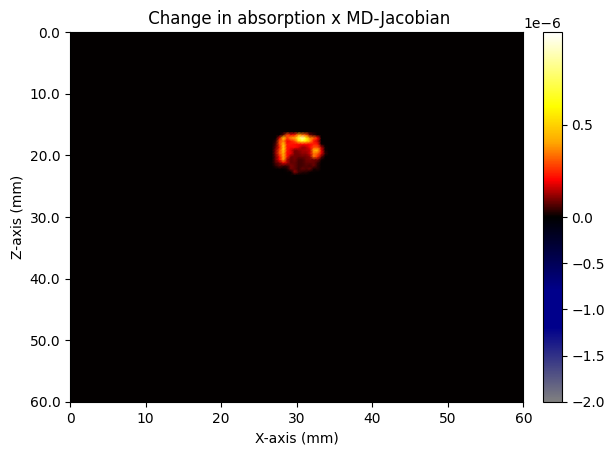

In [6]:


# plotting "Change in abs" x MD-jacoboan

norm = mcolors.TwoSlopeNorm(vmin=-0.2e-5, vcenter=0, vmax=0.1e-5)

# Create a custom colormap
cmap_colors = [
    (0, "grey"),  
    (0.2, "darkblue"),
    (0.3, "darkblue"),
    (0.5, "black"),     
    (0.6, "red"),    
    (0.7, "orange"),      
    (0.8, "yellow"),
    (1.0, "white")     
]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)


# Plot using `pcolormesh` for smooth shading
X, Z = np.meshgrid(np.linspace(0, 60, abs_md.shape[1]),  
                   np.linspace(0, 60, abs_md.shape[2]))
h = plt.pcolormesh(X, Z, -abs_md[60, :, :].T, cmap=custom_cmap, norm=norm, shading='gouraud')

# Add colorbar
plt.colorbar(h, fraction=0.046, pad=0.04)


#Invert z axis
yticks = plt.gca().get_yticks()  # Get the original tick positions
plt.gca().set_yticks(yticks)  # Set them back
plt.gca().set_yticklabels(yticks[::-1])



# Show plot
plt.xlabel("X-axis (mm)")
plt.ylabel("Z-axis (mm)")
plt.title(" Change in absorption x MD-Jacobian")
plt.show()


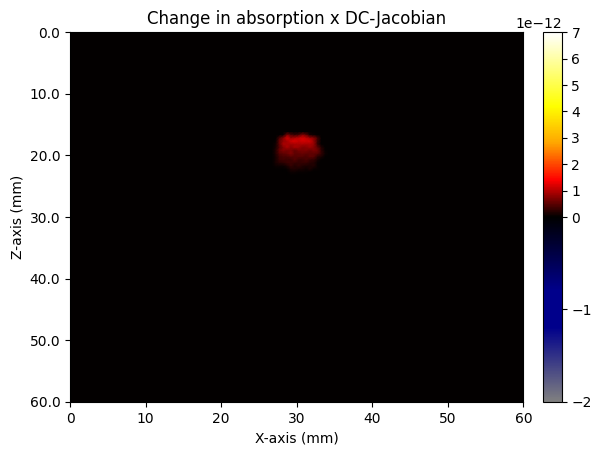

In [7]:
# plotting "Change in abs" x DC-jacobian


norm = mcolors.TwoSlopeNorm(vmin=-0.2e-11, vcenter=0, vmax=0.7e-11)

# Create a custom colormap
cmap_colors = [
    (0, "grey"),  
    (0.2, "darkblue"),
    (0.3, "darkblue"),
    (0.5, "black"),     
    (0.6, "red"),    
    (0.7, "orange"),      
    (0.8, "yellow"),
    (1.0, "white")     
]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)


# Plot using `pcolormesh` for smooth shading
X, Z = np.meshgrid(np.linspace(0, 60, abs_J0.shape[1]),  
                   np.linspace(0, 60, abs_J0.shape[2]))
h = plt.pcolormesh(X, Z, -abs_J0[60, :, :].T, cmap=custom_cmap, norm=norm, shading='gouraud')

# Add colorbar
plt.colorbar(h, fraction=0.046, pad=0.04)


#Invert z axis
yticks = plt.gca().get_yticks()  # Get the original tick positions
plt.gca().set_yticks(yticks)  # Set them back
plt.gca().set_yticklabels(yticks[::-1])



# Show plot
plt.xlabel("X-axis (mm)")
plt.ylabel("Z-axis (mm)")
plt.title("Change in absorption x DC-Jacobian")
plt.show()


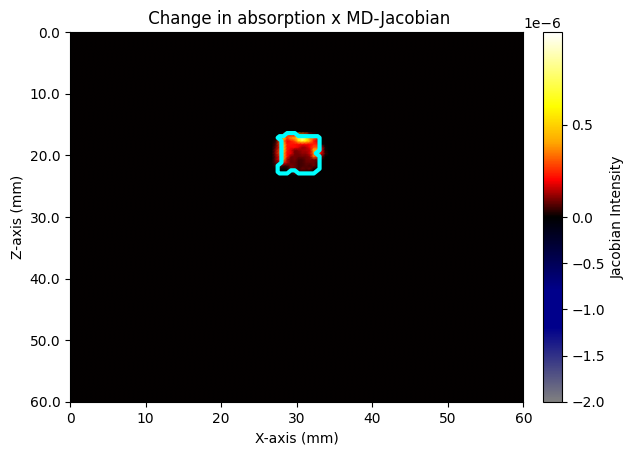

In [8]:
#Include the US-patch-boundary on the ["Change in abs" x MD-jacobian plot]

# plotting the US position

tmp3= np.zeros(len(Mymesh_mus.mesh.nodes))
tmp3[Mymesh_mus.selection] = 1                # accessing US-points in mesh from main program
tmp4 = Mymesh_mus.mesh.vol.mesh2grid@tmp3     # mesh to grid interpolation 

tmp4 = tmp4.reshape(1,-1)          # Reshaped to look similiar to a jacobian, shape: (1, 1728000)
tmp5 = (tmp4>0.9)                  # tmp5 holds "True" for array values >0.8.  
indices = np.where(tmp5)[0]        # selection of all indices whose the threshold is >0.8 , or points corresponding to nodes that has an ultrasound pressure value assigned


tmp6 = np.zeros_like(tmp4)
tmp6[indices] = tmp4[indices]

us = tmp6.reshape((Mymesh_mus.xgrid.size, Mymesh_mus.ygrid.size, Mymesh_mus.zgrid.size), order='f') 





# plotting "Change in abs" x MD-jacobian

X, Z = np.meshgrid(np.linspace(0, 60, abs_md.shape[1]),  
                   np.linspace(0, 60, abs_md.shape[2]))

fig, ax = plt.subplots()

us_patch = us[60, :, :].T
us_mask = (us_patch > 0.1 * us_patch.max()).astype(float)
ax.pcolormesh(X, Z, us_mask, cmap='gray', shading='gouraud', alpha=1)

norm = mcolors.TwoSlopeNorm(vmin=-0.2e-5, vcenter=0, vmax=0.1e-5)

# Create a custom colormap
cmap_colors = [
    (0, "grey"),  
    (0.2, "darkblue"),
    (0.3, "darkblue"),
    (0.5, "black"),     
    (0.6, "red"),    
    (0.7, "orange"),      
    (0.8, "yellow"),
    (1.0, "white")     
]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)

jac_plot = ax.pcolormesh(X, Z, -abs_md[60, :, :].T, cmap=custom_cmap, norm=norm, shading='gouraud', alpha=1)

# 3. Draw a bright boundary around the ORIGINAL mask — no dilation
contour = ax.contour(X, Z, us_mask, levels=[0.5], colors='cyan', linewidths=3)

# 4. Colorbar
cbar = plt.colorbar(jac_plot, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Jacobian Intensity')

# 5. Invert Z-axis
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels(yticks[::-1])

# 6. Final labels
ax.set_xlabel("X-axis (mm)")
ax.set_ylabel("Z-axis (mm)")
ax.set_title(" Change in absorption x MD-Jacobian")
plt.show()




In [9]:
# SECTION 3
#
#
#
#
#
#
#
#
#
#
#
#
#
# Make necessary changes(If any- like change of abs z-position) here seperately, 
# and run this section for processing and viewing all jacobians for changing absorber x-positions all at once(x-axis scan)

In [10]:
# Calculating Jacobians at all positions at once -  Put the changing-position-of-absorber in "for-loop" 

abs_md = np.zeros((61, 120, 120, 120))     # 13 because range(0,65,5) has 13 steps
abs_md_avg = np.zeros(61)
abs_J0 = np.zeros((61, 120, 120, 120))
abs_J0_avg = np.zeros(61)


for i in range(0, 65, 5):

    # create an absorber of desired size and position

    dia_ab = 6    #diameter of spherical absorber
    x_cen_ab,y_cen_ab,z_cen_ab = [i,30,30]      #centre of the absorber
    dist_ab = np.sqrt(np.square((Mymesh_mus.mesh.nodes[:,0]-x_cen_ab)) + np.square((Mymesh_mus.mesh.nodes[:,1]-y_cen_ab)) + np.square((Mymesh_mus.mesh.nodes[:,2]-z_cen_ab)))
    ind_ab = dist_ab < dia_ab/2
    mua_selection = np.where(ind_ab)


    # creating the difference in absorption 

    tmp1= np.zeros(len(Mymesh_mus.mesh.nodes))
    tmp1[mua_selection] = 0.01               # in-effect, this is the difference in abs
    tmp2 = Mymesh_mus.mesh.vol.mesh2grid@tmp1     # mesh to grid interpolation 
    tmp2 = tmp2.reshape(1,-1)          # Reshaped to look similiar to a jacobian, shape: (1, 1728000)

    abs_patch = tmp2.reshape((Mymesh_mus.xgrid.size, Mymesh_mus.ygrid.size, Mymesh_mus.zgrid.size), order='f')     #absorber batch , 120x120x120



    #Multiplying the "Change in abs" with the Jacobians

    abs_md[i] = Mymesh_mus.banana_md * abs_patch
    abs_md_avg[i] = np.sum(abs_md[i])


    abs_J0[i] = Mymesh_mus.banana1 * abs_patch
    abs_J0_avg[i] = np.sum(abs_J0[i])
    
    print("\n Jacobians at ",i,"mm")
    print("DC: ",abs_J0_avg[i])
    print("MD: ",abs_md_avg[i])





 Jacobians at  0 mm
DC:  8.249525954797698e-12
MD:  9.652256176374328e-08

 Jacobians at  5 mm
DC:  2.464071120594156e-11
MD:  3.293407160864595e-07

 Jacobians at  10 mm
DC:  3.5748653786742005e-11
MD:  6.136109896821709e-07

 Jacobians at  15 mm
DC:  4.476289369791575e-11
MD:  1.233378330646768e-06

 Jacobians at  20 mm
DC:  4.366129373339786e-11
MD:  2.635197770225486e-06

 Jacobians at  25 mm
DC:  3.9996856108067e-11
MD:  6.01117986542767e-06

 Jacobians at  30 mm
DC:  3.465764687040113e-11
MD:  8.5962754119231e-06

 Jacobians at  35 mm
DC:  3.918430775006727e-11
MD:  6.141135176962123e-06

 Jacobians at  40 mm
DC:  4.120941251162437e-11
MD:  2.5361992432735733e-06

 Jacobians at  45 mm
DC:  3.9955665591604403e-11
MD:  1.190410653912979e-06

 Jacobians at  50 mm
DC:  3.5342080705657553e-11
MD:  6.477753246633434e-07

 Jacobians at  55 mm
DC:  2.2554549199726146e-11
MD:  3.186951124868195e-07

 Jacobians at  60 mm
DC:  5.099994166806629e-12
MD:  6.400634926323829e-08


In [11]:
abs_J0_avg_save = {}
abs_md_avg_save = {}

for i in range(0, 65, 5):
    abs_J0_avg_save[i / 5] = abs_J0_avg[i]
    abs_md_avg_save[i / 5] = abs_md_avg[i]

# Print abs_J0_avg values only
print("Abs_J0_avg values:")
for val in abs_J0_avg_save.values():
    print(f"{val:.6e}")

print("\nAbs_MD_avg values:")
for val in abs_md_avg_save.values():
    print(f"{val:.6e}")



Abs_J0_avg values:
8.249526e-12
2.464071e-11
3.574865e-11
4.476289e-11
4.366129e-11
3.999686e-11
3.465765e-11
3.918431e-11
4.120941e-11
3.995567e-11
3.534208e-11
2.255455e-11
5.099994e-12

Abs_MD_avg values:
9.652256e-08
3.293407e-07
6.136110e-07
1.233378e-06
2.635198e-06
6.011180e-06
8.596275e-06
6.141135e-06
2.536199e-06
1.190411e-06
6.477753e-07
3.186951e-07
6.400635e-08


In [12]:
# # plotting the Jacobians at all positions at once - one by one (NOT together in a single palette)


# for i in range(0, 65, 5):

#     # plotting "Change in abs" x MD-jacoboan

#     norm = mcolors.TwoSlopeNorm(vmin=-0.2e-5, vcenter=0, vmax=0.1e-5)

#     # Create a custom colormap
#     cmap_colors = [
#         (0, "grey"),  
#         (0.2, "darkblue"),
#         (0.3, "darkblue"),
#         (0.5, "black"),     
#         (0.6, "red"),    
#         (0.7, "orange"),      
#         (0.8, "yellow"),
#         (1.0, "white")     
#     ]
#     custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)


#     # Plot using `pcolormesh` for smooth shading
#     X, Z = np.meshgrid(np.linspace(0, 60, abs_md.shape[1]),  
#                     np.linspace(0, 60, abs_md.shape[2]))
#     h = plt.pcolormesh(X, Z, -abs_md[i,60, :, :].T, cmap=custom_cmap, norm=norm, shading='gouraud')

#     # Add colorbar
#     plt.colorbar(h, fraction=0.046, pad=0.04)


#     #Invert z axis
#     yticks = plt.gca().get_yticks()  # Get the original tick positions
#     plt.gca().set_yticks(yticks)  # Set them back
#     plt.gca().set_yticklabels(yticks[::-1])



#     # Show plot
#     plt.xlabel("X-axis (mm)")
#     plt.ylabel("Z-axis (mm)")
#     plt.title(" Change in absorption x MD-Jacobian")
#     plt.show()

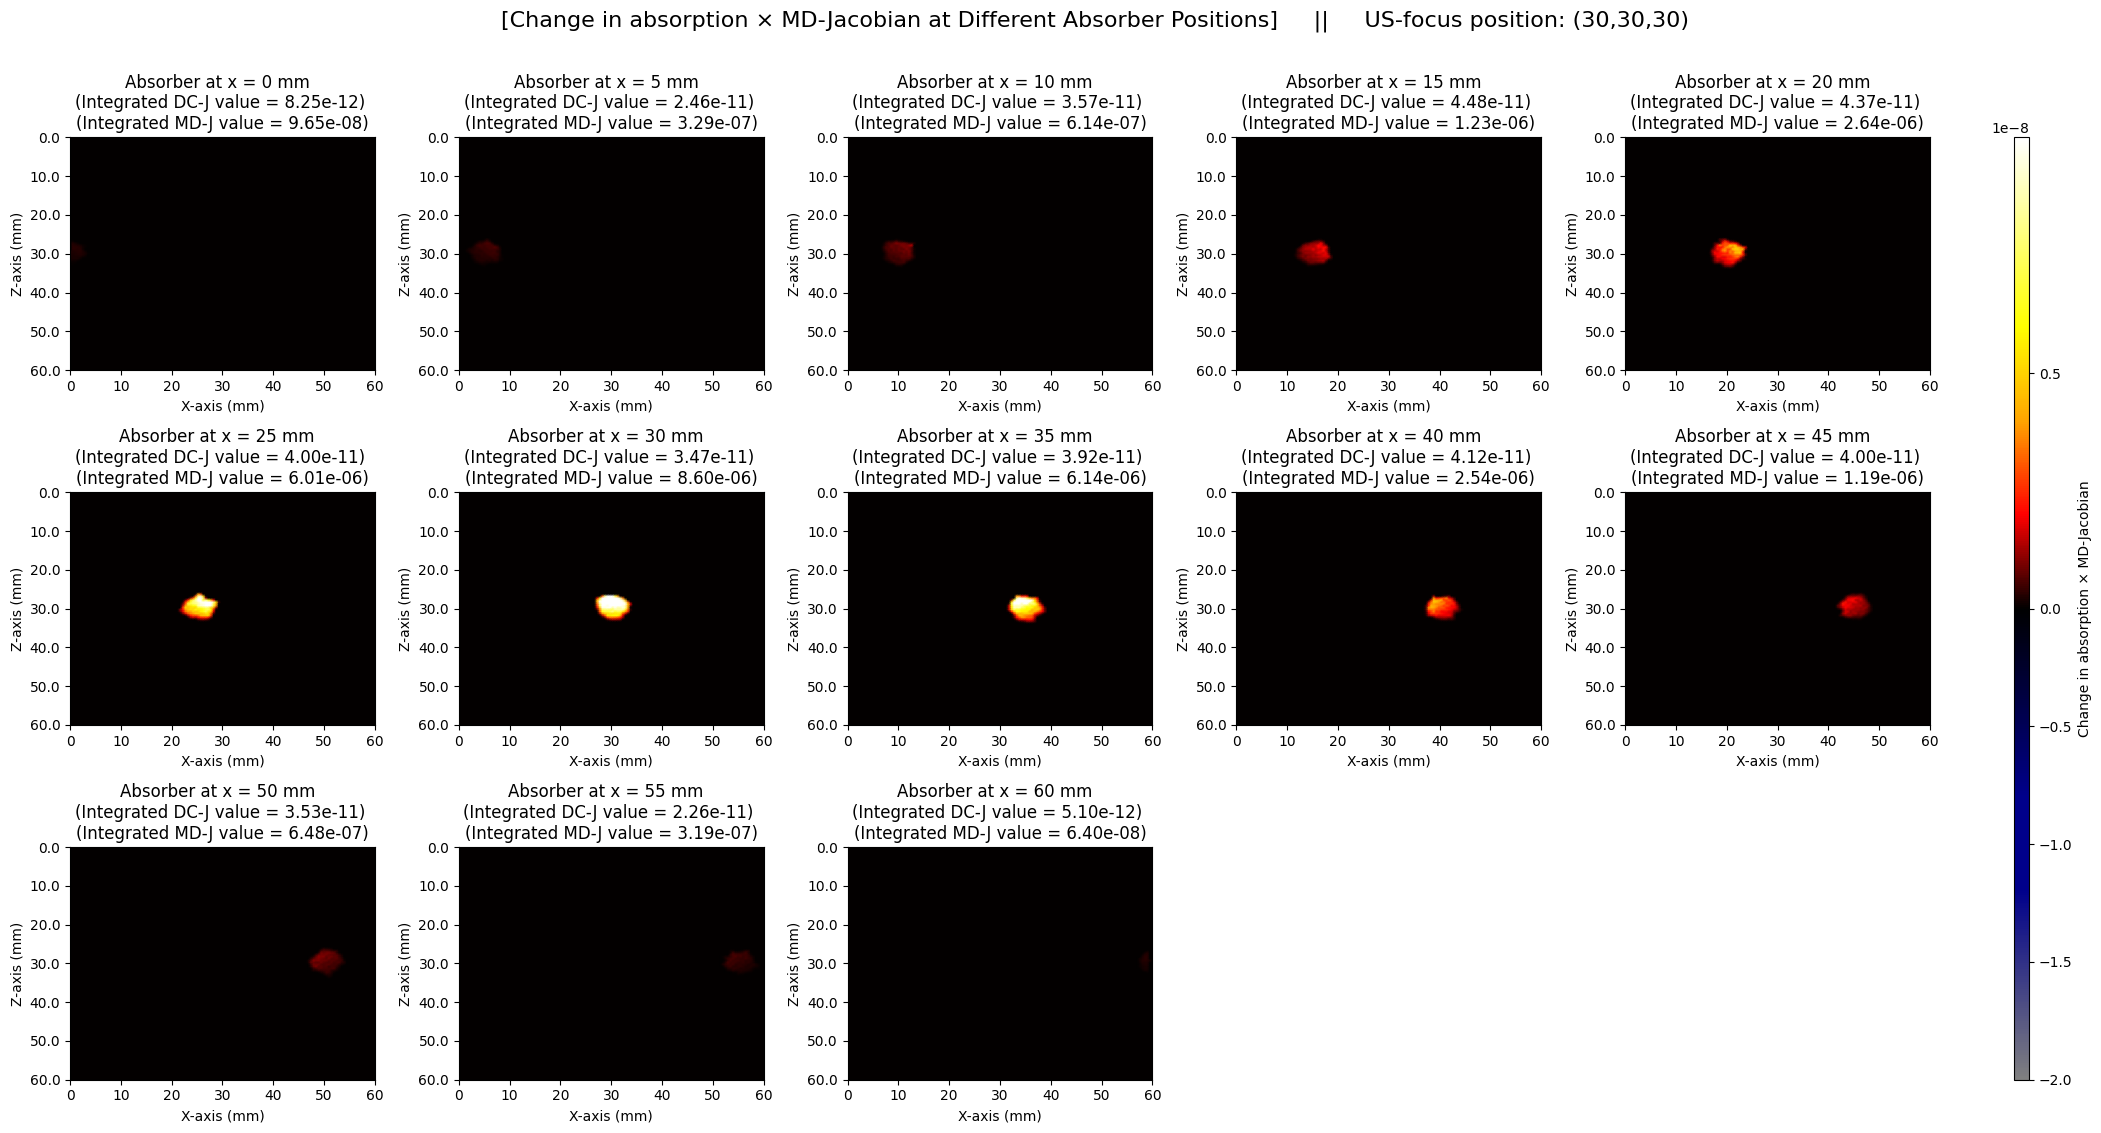

In [13]:
# plotting the Jacobians at all positions at once -  together in a single palette



# Define color scale and colormap
norm = mcolors.TwoSlopeNorm(vmin=-0.2e-7, vcenter=0, vmax=0.1e-7)
cmap_colors = [
    (0, "grey"),
    (0.2, "darkblue"),
    (0.3, "darkblue"),
    (0.5, "black"),
    (0.6, "red"),
    (0.7, "orange"),
    (0.8, "yellow"),
    (1.0, "white")
]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)

# Create a figure with 6 columns: 5 for plots, 1 for colorbar
fig = plt.figure(figsize=(22, 12))
gs = gridspec.GridSpec(nrows=3, ncols=6, width_ratios=[1, 1, 1, 1, 1, 0.05])  # last column = colorbar

plot_axes = []  # To collect used axes for colorbar scope

# Plot loop
for idx, i in enumerate(range(0, 65, 5)):
    row = idx // 5
    col = idx % 5
    ax = fig.add_subplot(gs[row, col])
    plot_axes.append(ax)

    # Meshgrid and plot
    X, Z = np.meshgrid(
        np.linspace(0, 60, abs_md.shape[1]),
        np.linspace(0, 60, abs_md.shape[2])
    )

    h = ax.pcolormesh(X, Z, abs_md[i, 60, :, :].T, cmap=custom_cmap, norm=norm, shading='gouraud')
    
    #contour = ax.contour(X, Z, us_mask, levels=[0.5], colors='cyan', linewidths=3)             # the only line for marking US-boundary(in this code-cell).. the preparatory codes for the same("us-mask") are written in earlier cells

    # Invert Z-axis
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks[::-1])

    ax.set_xlabel("X-axis (mm)")
    ax.set_ylabel("Z-axis (mm)")
    ax.set_title(f"Absorber at x = {i} mm  \n(Integrated DC-J value = {abs_J0_avg[i]:.2e}) \n(Integrated MD-J value = {abs_md_avg[i]:.2e})" )

# Colorbar on the far-right column
cbar_ax = fig.add_subplot(gs[:, -1])
cbar = fig.colorbar(h, cax=cbar_ax)
cbar.set_label("Change in absorption × MD-Jacobian")

# Super-title and layout
fig.suptitle("[Change in absorption × MD-Jacobian at Different Absorber Positions]     ||     US-focus position: (30,30,30)",  fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 0.96, 0.93])  # Make room for title and colorbar
plt.show()
